In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Condicionamiento clásico

## Rescorla-wagner

La ley de (Rescorla and Wagner, 1972) provee una cuenta concisa de ciertos aspectos del condicionamiento clásico. La regla está basada en una simple predicción lineal de la recompensa asociada al estimulo.

Definimos una simple variable binaria $\mu$ para representar la presencia o ausencia de un estimulo.( $\mu = 1$ si el estimulo está presente $\mu = 0$ en caso contrario) 

La recompensa esperada, denotada por $v$,es el estimulo $\mu$ multiplicado por un peso $w$

$$v=w\mu$$

El valor de $w$ está establecido por una regla de aprendizaje que minimiza el error cuadratico $(r-v)^2$ entre la recompensa real $r$ y la predicción $v$. En razón de miminizar esto , se construye un descenso del gradiente.

$$w\rightarrow w + \epsilon \delta \mu$$ <center>con</center> $$\delta = r -v$$

Aquí $\epsilon $ es el indice de aprendizaje ,podemos interpretar la actividad de las celulas dopaminergicas en el [area tegmental ventral](https://es.wikipedia.org/wiki/Área_tegmental_ventral) como codificación de una forma de este error de predicción.


Si $\epsilon$ suficientemente $\mu = 1$ En cada iteración (El estimulo está siempre presente), la regla finalmente hará que $w$
fluctue cerca del valor $w = r$, en éste punto el valor promedio de  $\delta$ será $0$.

Aquí $s$ es el estimulo, $r$ la recompensa, $\cdot$ es la ausenciai de recompensa , $'r'$ es la recompensa esperada y $'\cdot'$ es un valor esperado de la ausencia de recompensa

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-0pky">Paradigma</th>
    <th class="tg-0pky">Pre-entrenamiento</th>
    <th class="tg-0pky">Entrenamiento</th>
    <th class="tg-0pky">Resultado<br></th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky">Pavloviano</td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky">$s\rightarrow r$</td>
    <td class="tg-0pky">$s\rightarrow 'r'$</td>
  </tr>
  <tr>
    <td class="tg-0pky">Extinción<br></td>
    <td class="tg-0pky">$s\rightarrow r$</td>
    <td class="tg-0pky">$s\rightarrow \cdot$</td>
    <td class="tg-0pky">$s\rightarrow '\cdot'$</td>
  </tr>
  <tr>
    <td class="tg-0pky">Parcial</td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky">$s\rightarrow \cdot \; s\rightarrow r$</td>
    <td class="tg-0pky">$s\rightarrow \alpha 'r'$</td>
  </tr>
</tbody>
</table>

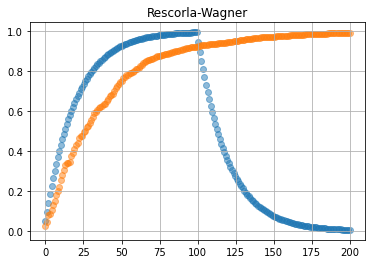

In [15]:
#Rescorla-Wagner
trials=200
recompensas= np.concatenate((np.ones(100),np.zeros(100)))
estimulo, recompensa,estimuloA=np.ones(trials),np.ones(trials),np.random.random_sample((200,))
def reglaRW(recompensa,estimulos,indice_de_aprendizaje):
    tamano=estimulos.shape[0]
    pesos=[]
    w=0
    for i in range(tamano):
        delta= recompensa[i] - w
        w+=indice_de_aprendizaje*delta*estimulos[i]
        pesos.append(w)
#         print(w)
    return pesos


wEstimulo=reglaRW(recompensas,estimulo,0.05)
AlEstimulo=reglaRW(recompensa,estimuloA,0.05)
espacio=np.linspace(0,200,200)

plt.title("Rescorla-Wagner")
plt.scatter(espacio,wEstimulo,alpha=0.5)
plt.scatter(espacio,AlEstimulo,alpha=0.5)
plt.grid()
plt.show()

En la gráfica anterior podemos ver una relación entre el numero de iteraciones y el estimulo esperado. en la gráfica azul vemos primero el caso Pavloviano, luego de la iteración 100 vemos el proceso de extinción y en la gráfica naranja vemos el paradigma parcial.